<div>

<center>

<h1>Modelo de Aprendizado de Máquina para Predição de Candidatos no Ingresso de Programas de Mestrado. </h1>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*c9IiDgkWq-uTXTyFApA0UQ.jpeg" alt="mestrado">

</center>
</div>

<div>
<p><b>Descrição</b>:
Grande parte dos alunos egressos de cursos superiores tem como objetivo ingressar em algum programa de pós-graduação a fim de se tornarem Mestres em suas respectivas áreas do conhecimento. O processo de seleção realizado em cada universidade faz uso de uma quantidade considerável de parâmetros, alguns deles bastante subjetivos. Sendo assim, um modelo baseado em aprendizado de máquina pode ser de grande importância tanto para o corpo docente envolvido na seleção como para os alunos que desejam participar do processo.  Nesse projeto desenvolveremos um modelo baseado em informações usadas em importantes universidades do mundo para avaliar seus candidatos e que possuem semelhantes com algumas universidades brasileiras.</p>

<p>Cada grupo precisa entregar um notebook com:</p>

<ul>
<li>Uma análise exploratória dos dados</li>
<li>Uma etapa de pré-processamento (veja o que é necessário fazer: limpeza, extração de novas features, seleção de features, etc)</li>
<li>Fazer o treinamento, usando pelo menos 2 técnicas: um classificador padrão de ML (árvore de decisão) e uma rede neural.</li>
<li>No Caso da Rede Neural, explique um pouco como fez pra encontrar os hiperparâmetros.</li>
<li>Avaliar os modelos usando a métrica MSE (Mean Squared Error)</li>
</ul>

</div>

<div>
<p><b>Dataset:</b></p>
<p>Os atributos do dataset são os seguintes: GRE Scores (0-340), TOEFL Scores (0-120), University Rating (0-5), Statement of Purpose and Letter of Recommendation Strength (0-5), Undergraduate GPA (0-10), Research Experience (0 ou 1) e Chance of Admit (0-1)</p>
</div>

<div>
<p><b>Atributos preditores:</b></p>
<p>GRE Score: nota de um exame semelhante à POS-COMP</p>
<p>TOEFL: conhecimento em língua estrangeira</p>
<p>University rating: nota da universidade em que a pessoa fez a graduação</p>
<p>Statement of Purpose and Letter of Recommendation Strength: nota atribuída à justificativa do candidato e à carta de recomendação</p>
<p>Undergraduate GPA: equivalente ao coeficiente de rendimento escolar</p>

<p><b>Atributo alvo:</b></p>
<p>Chance of Admit: descreve a probabilidade do candidato ser admito (1) ou não (0).</p>

</div>

<h2>Importando bibliotecas</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Carregando dados</h2>

In [ ]:
students = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
students.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
students.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


<h2>Análise exploratória dos dados - I</h2>

Tamanho do dataset

In [ ]:
students.shape

(400, 9)

<p>Observando-se se há dados faltantes na base</p>

In [ ]:
students.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<p>Checando tipos de dados</p>

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<h2>Aplicando pré-processamento nos dados</h2>

In [ ]:
students = (students.rename(columns={
                "Serial No.": "serial_no",
                "GRE Score": "gre_sc",
                "TOEFL Score": "toefl_sc",
                "University Rating": "uni_rate",
                "Chance of Admit ": "chance",
                "LOR ": "LOR"})
            .iloc[:, 1:]
)

<h2>Análise exploratória dos dados - II</h2>

In [ ]:
students.head()

,gre_sc,toefl_sc,uni_rate,SOP,LOR,CGPA,Research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<p>Observando dados estatísticos e distribuições</p>

In [ ]:
students.describe()

,gre_sc,toefl_sc,uni_rate,SOP,LOR,CGPA,Research,chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<p>Distribuição de notas do exame</p>

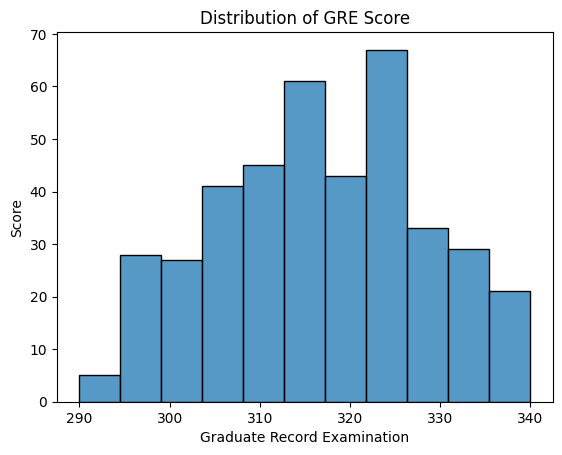

In [ ]:
sns.histplot(data=students, x='gre_sc')
plt.xlabel('Graduate Record Examination')
plt.ylabel('Score')
plt.title('Distribution of GRE Score')
plt.show()

<p><b>Hipotése:</b> Alunos que possuem experiência em pesquisa possuem maiores chances de ingressar em um programa de mestrado</p>

Text(0.5, 1.0, 'Chance of Admit for Researchers and No Researchers')

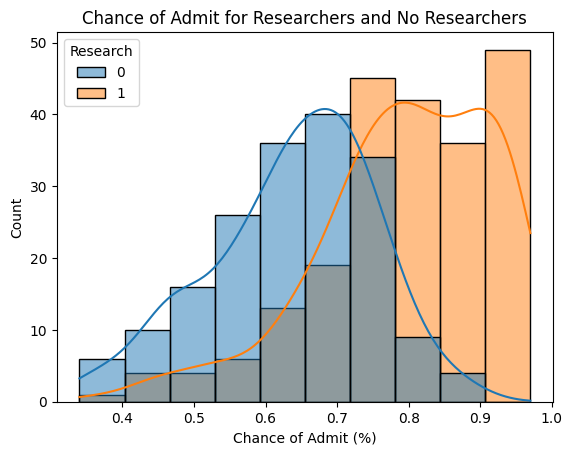

In [ ]:
sns.histplot(data=students, x='chance', bins=10, kde=True, hue='Research')
plt.xlabel('Chance of Admit (%)')
plt.ylabel('Count')
plt.title('Chance of Admit for Researchers and No Researchers')

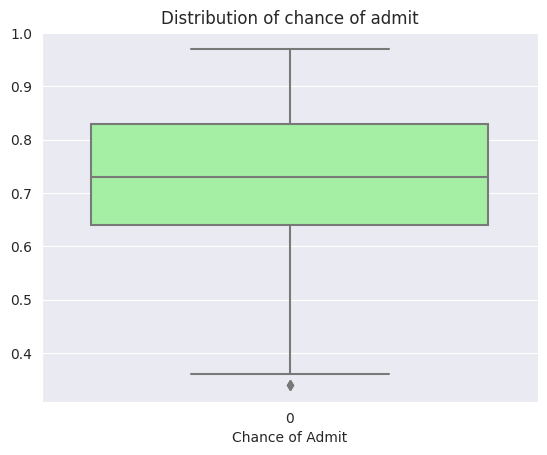

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(students['chance'], color='palegreen')
plt.xlabel('Chance of Admit')
plt.title('Distribution of chance of admit')
plt.show()

<p>Observando a correlação entre GRE Score, exame TOEFL e o coeficiente de rendimento escolar, entre os alunos que possuem experiência em pesquisa e os que não possem</p>

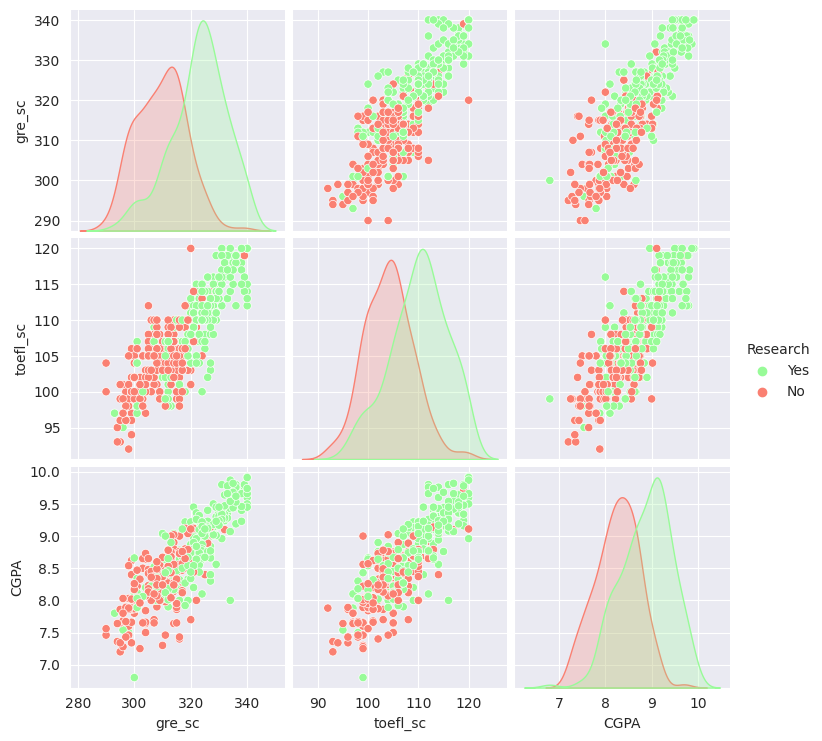

In [ ]:
def research_or_not(val):
    if val:
        return 'Yes'
    return 'No'

sns.set_style('darkgrid')

students_copy = students.copy()
students_copy['Research'] = students_copy['Research'].apply(research_or_not)
sns.pairplot(
    data=students_copy.drop(['SOP', 'LOR', 'uni_rate', 'chance'], axis=1),
    hue='Research',
    palette={'Yes': 'palegreen', 'No': 'salmon'}
)

<p><b>Pergunta:</b> Quantos alunos há em cada uma das notas de suas respectivas universidades?</p>

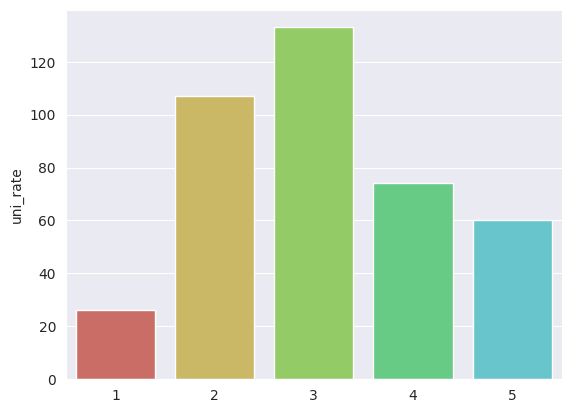

In [ ]:
range_data = np.array([1, 2, 3, 4, 5])
count_uni_rate = students['uni_rate'].value_counts().sort_index()

sns.set_style('darkgrid')
sns.barplot(x=range_data, y=count_uni_rate, palette=sns.color_palette("hls", 8))
plt.show()

<h1>Prevendo valores utilizando redes neurais</h1>

<p>Separando variáveis dependentes das variáveis independentes</p>

In [ ]:
X = students.iloc[:, :-1].values
y = students.iloc[:, -1].values

In [ ]:
X[:3, :]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ]])

In [ ]:
y[:3]

array([0.92, 0.76, 0.72])

<h3>Separando dados em conjunto de treino e teste</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [ ]:
X_train[:3, :], X_test[:3, :], y_train[:3], y_test[:3]

(array([[321.  , 111.  ,   3.  ,   3.5 ,   4.  ,   8.83,   1.  ],
        [333.  , 119.  ,   5.  ,   5.  ,   4.5 ,   9.78,   1.  ],
        [340.  , 120.  ,   5.  ,   4.5 ,   4.5 ,   9.91,   1.  ]]),
 array([[328.  , 110.  ,   4.  ,   5.  ,   4.  ,   9.14,   1.  ],
        [315.  , 107.  ,   2.  ,   4.  ,   3.  ,   8.5 ,   1.  ],
        [339.  , 114.  ,   5.  ,   4.  ,   4.5 ,   9.76,   1.  ]]),
 array([0.77, 0.96, 0.97]),
 array([0.82, 0.56, 0.96]))

<h3>Aplicando normzalização nos dados</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
X_train[:3, :]

array([[ 0.33266647,  0.54968142, -0.06898615,  0.10078767,  0.62343021,
         0.36128054,  0.89883792],
       [ 1.36786847,  1.82200008,  1.62913444,  1.54490948,  1.17913402,
         1.92313041,  0.89883792],
       [ 1.9717363 ,  1.98103992,  1.62913444,  1.06353554,  1.17913402,
         2.13685723,  0.89883792]])

<h3>Transformação da variável dependente</h3>

<p>Como dito, o objetivo é prever se um aluno é aprovado (1) ou reprovado (0) para um programa de mestrado, ou seja, realizar uma classificação dos alunos. No entanto, o que temos de valor na variável dependente é a probabilidade do aluno ser aprovado. Por isso, é feita a seguinte consideração:</p>

<ul>
<li>O aluno que tiver uma chance maior que 80%, será considerado como aprovado (1)</li>
<li>Caso contrário, o aluno é considerado como reprovado (0)</li>
</ul>

In [ ]:
y_train_c = [1 if score > 0.8 else 0 for score in y_train]
y_test_c = [1 if score > 0.8 else 0 for score in y_test]

<h3>Treinando rede neural de classificação</h3>

<p>Para realizar o experimento, foi escolhida uma rede neural para classificação chamada de `MLPClassifier`, presente no <i>scikit-learn</i>. <p/>

<p>Abaixo são mostrados os hiperparâmetros selecionados:</p>


In [ ]:
from sklearn.neural_network import MLPClassifier
neural_net_classifier = MLPClassifier(
    max_iter=2500, verbose=True, tol=0.00001,
    solver='lbfgs',
    activation='logistic',
    hidden_layer_sizes=(200, 200)
)

<p>Realizando treinamento do modelo</p>

In [ ]:
neural_net_classifier.fit(X_train, y_train_c)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 200),
              max_iter=2500, solver='lbfgs', tol=1e-05, verbose=True)

<p>Prevendo valores</p>

In [ ]:
predictions = neural_net_classifier.predict(X_test)

In [ ]:
predictions

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test_c, predictions)

0.8

<p>Calculando MSE e R2 Score do modelo</p>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score do modelo é:', r2_score(y_test_c, predictions))
print('MSE do modelo é:', mean_squared_error(y_test_c, predictions))

r2 score do modelo é: 0.04761904761904745
MSE do modelo é: 0.2


<h1>Prevendo valores com Machine Learning - Árvore de Decisão</h1>

In [ ]:
students

,gre_sc,toefl_sc,uni_rate,SOP,LOR,CGPA,Research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Dividindo os valores entre as variáveis independentes e dependentes.

In [ ]:
#Bibliotecas necessárias para fazer a classificação e acurácia.
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

#columns = len(students.columns)

# Separando a nossa classe alvo e nossas features entre y e X.
y = students['chance'] # extrai a primeira coluna, que é o label
X = students[['gre_sc','toefl_sc','uni_rate', 'SOP', 'LOR','CGPA', 'Research']]

<p>Separando conjunto de dados em treinamento e teste com 20% para o conjunto de testes</p>

In [ ]:
#Separando os valores de teste e treino.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47) # 80% treino e 20% teste

In [ ]:
y_train_c = [1 if score > 0.8 else 0 for score in y_train]
y_test_c = [1 if score > 0.8 else 0 for score in y_test]

<p>Instanciando modelo e realizando treinamento</p>

In [ ]:
# Treinamendo da Árvore de Decisão
model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
#model = tree.DecisionTreeRegressor()
# model = tree.DecisionTreeClassifier()  #Instanciando o modelo
model.fit(X_train, y_train_c) # treinando o modelo

DecisionTreeClassifier(criterion='entropy', max_depth=2)

<p>Predição de resultados e avaliação do modelo</p>

In [ ]:
# Predição e Resultados

result = model.predict(X_test)

acc = metrics.accuracy_score(result, y_test_c)
print("{}".format(acc*100))

print(list(result))
print(list(y_test))

91.25
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[0.97, 0.79, 0.78, 0.89, 0.48, 0.94, 0.86, 0.8, 0.9, 0.82, 0.54, 0.57, 0.59, 0.75, 0.66, 0.64, 0.63, 0.86, 0.7, 0.8, 0.65, 0.9, 0.87, 0.71, 0.82, 0.62, 0.46, 0.78, 0.67, 0.71, 0.54, 0.71, 0.91, 0.91, 0.94, 0.48, 0.72, 0.65, 0.9, 0.47, 0.74, 0.89, 0.48, 0.72, 0.92, 0.93, 0.61, 0.67, 0.74, 0.71, 0.66, 0.75, 0.65, 0.64, 0.77, 0.75, 0.59, 0.86, 0.81, 0.74, 0.8, 0.68, 0.76, 0.73, 0.86, 0.76, 0.7, 0.64, 0.85, 0.85, 0.77, 0.93, 0.68, 0.77, 0.69, 0.64, 0.9, 0.79, 0.71, 0.62]


[Text(0.5, 0.8333333333333334, 'x[5] <= 8.965\nentropy = 0.87\nsamples = 320\nvalue = [227, 93]'),
 Text(0.25, 0.5, 'x[5] <= 8.63\nentropy = 0.244\nsamples = 223\nvalue = [214, 9]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.053\nsamples = 168\nvalue = [167, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.598\nsamples = 55\nvalue = [47, 8]'),
 Text(0.75, 0.5, 'x[5] <= 9.125\nentropy = 0.568\nsamples = 97\nvalue = [13, 84]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.935\nsamples = 37\nvalue = [13, 24]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 60\nvalue = [0, 60]')]

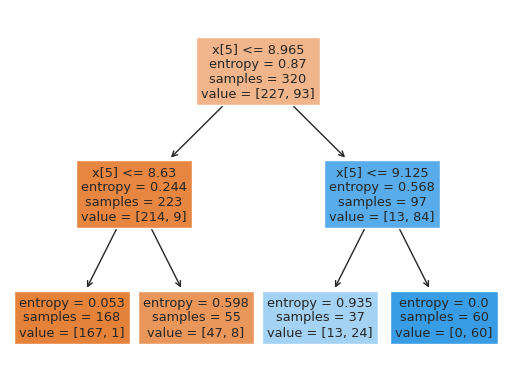

In [ ]:
tree.plot_tree(model,filled=True)